In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load and prepare the data
df = pd.read_csv('eu.csv')
df.columns = df.columns.str.strip()  # Clean column names
prices = df['close'].values.reshape(-1, 1)  # Only use 'close' price

# Normalize prices
scaler = MinMaxScaler()
normalized_prices = scaler.fit_transform(prices)



# Sequence lengths
INPUT_SEQ = 100
PREDICT_SEQ = 50

# Generate sequences
X, y = [], []
for i in range(len(normalized_prices) - INPUT_SEQ - PREDICT_SEQ):
    X.append(normalized_prices[i:i+INPUT_SEQ])
    y.append(normalized_prices[i+INPUT_SEQ:i+INPUT_SEQ+PREDICT_SEQ].flatten())

X = np.array(X)
y = np.array(y)

train_size = int(len(X) * 0.9)  # 90% for training+validation
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (11965, 100, 1), y shape: (11965, 50)


In [ ]:
# model = Sequential([
#     # LSTM(64, activation='relu', return_sequences=False, input_shape=(INPUT_SEQ, 1)),
#     # Dense(PREDICT_SEQ, activation='relu')
#     LSTM(128, activation='relu', return_sequences=True, input_shape=(INPUT_SEQ, 1)),
#     Dropout(0.2),

#     LSTM(64, activation='relu', return_sequences=False),
#     Dropout(0.2),

#     Dense(64, activation='relu'),
#     Dense(32, activation='relu'),

#     Dense(PREDICT_SEQ, activation='softplus')  # ensures output is positive
# ])

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(INPUT_SEQ, 1)),
    Dropout(0.2),

    LSTM(32, return_sequences=False),
    Dropout(0.2),

    Dense(32, activation='relu'),
    Dense(16, activation='relu'),

    Dense(PREDICT_SEQ, activation='relu')  # Simple ReLU for positive output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# Train
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Save model


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 100, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 50)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,746 (124.01 KB)

 Trainable params: 31,746 (124.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 30s 85ms/step - loss: 0.1097 - mae: 0.2305 - val_loss: 0.1155 - val_mae: 0.1765
Epoch 2/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 26s 86ms/step - loss: 0.0526 - mae: 0.1225 - val_loss: 0.0939 - val_mae: 0.1599
Epoch 3/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 44s 96ms/step - loss: 0.0395 - mae: 0.0983 - val_loss: 0.0491 - val_mae: 0.1076
Epoch 4/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 38s 85ms/step - loss: 0.0238 - mae: 0.0708 - val_loss: 0.0472 - val_mae: 0.0906
Epoch 5/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 25s 83ms/step - loss: 0.0238 - mae: 0.0694 - val_loss: 0.0489 - val_mae: 0.1073
Epoch 6/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 27s 89ms/step - loss: 0.0234 - mae: 0.0678 - val_loss: 0.0473 - val_mae: 0.0914
Epoch 7/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - loss: 0.0237 - mae: 0.0685 - val_loss: 0.0474 - val_mae: 0.0926
Epoch 8/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - loss: 0.0235 - mae: 0.0680 - val_loss: 0.0470 - val_mae: 0.0881
Epoch 9/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
model.save("model_lstm.h5", include_optimizer=False)

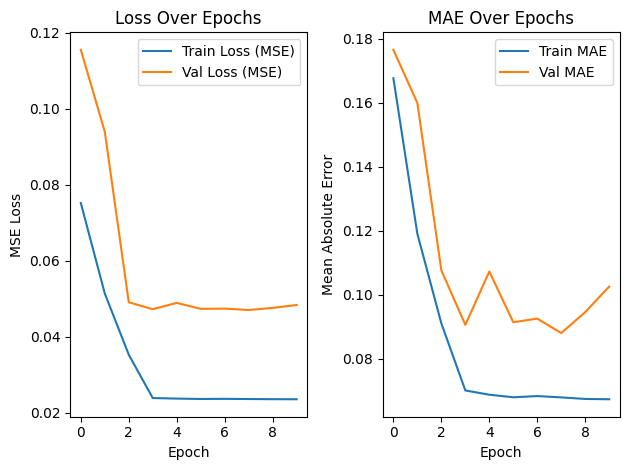

In [ ]:
# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Val Loss (MSE)')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

# Save and show
plt.tight_layout()
plt.savefig('training_metrics.png')
plt.show()


In [ ]:
def predict_next_50(last_100_prices):
    input_seq = np.array(last_100_prices).reshape(1, INPUT_SEQ, 1)
    input_seq_scaled = scaler.transform(input_seq[0])
    input_seq_scaled = input_seq_scaled.reshape(1, INPUT_SEQ, 1)

    prediction_scaled = model.predict(input_seq_scaled)
    prediction = scaler.inverse_transform(prediction_scaled.reshape(-1, 1)).flatten()
    return prediction.tolist()


In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MSE: {test_loss}, Test MAE: {test_mae}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0287 - mae: 0.0680
Test MSE: 0.02701788768172264, Test MAE: 0.06576862186193466


In [ ]:
# Load CSV again
df = pd.read_csv("eu.csv")
df.columns = df.columns.str.strip()
prices = df['close'].values.reshape(-1, 1)

# Normalize
scaler = MinMaxScaler()
normalized_prices = scaler.fit_transform(prices)
# Sequence lengths
INPUT_SEQ = 100
PREDICT_SEQ = 50
# Prepare input and ground truth
start_index = - (INPUT_SEQ + PREDICT_SEQ)
start_index = 400
input_seq = normalized_prices[start_index : start_index + INPUT_SEQ]

true_future = normalized_prices[start_index + INPUT_SEQ : start_index + INPUT_SEQ + PREDICT_SEQ]

input_seq_real = scaler.inverse_transform(input_seq)
true_future_real = scaler.inverse_transform(true_future)


# Load model
# model = load_model("model_lstm.h5")

# Predict
input_seq_reshaped = input_seq.reshape(1, INPUT_SEQ, 1)
prediction_scaled = predict_next_50(input_seq_reshaped)
# predicted_prices = scaler.inverse_transform(prediction_scaled.reshape(-1, 1))

# Show results
print("Last 100 Real Inputs:")
print(input_seq_real.flatten())

print("\nPredicted Next 50:")
print(prediction_scaled)

print("\nActual Next 50:")
print(true_future_real.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
Last 100 Real Inputs:
[0.6127 0.613  0.6137 0.6132 0.6129 0.6131 0.6132 0.6143 0.6138 0.6132
 0.6129 0.6133 0.6129 0.6125 0.6115 0.6122 0.6124 0.6123 0.6125 0.6121
 0.6116 0.6115 0.6106 0.6104 0.6087 0.6088 0.6103 0.6114 0.6115 0.6109
 0.6095 0.6092 0.6089 0.6095 0.6094 0.6104 0.6105 0.61   0.6083 0.61
 0.6099 0.6099 0.6105 0.6101 0.6107 0.6109 0.6112 0.6104 0.6096 0.6098
 0.6095 0.6093 0.6094 0.6098 0.6094 0.6094 0.6101 0.6104 0.6105 0.6105
 0.6119 0.6114 0.6121 0.6129 0.6133 0.6123 0.6125 0.6116 0.612  0.6119
 0.6117 0.6114 0.61   0.6105 0.61   0.6101 0.6098 0.6099 0.611  0.6105
 0.6099 0.609  0.609  0.609  0.6085 0.6087 0.6127 0.6116 0.6148 0.614
 0.6146 0.6185 0.62   0.62   0.6204 0.619  0.6205 0.6203 0.6209 0.6211]

Predicted Next 50:
[0.574052631855011, 0.5549490451812744, 0.554982602596283, 0.5703696608543396, 0.5588260293006897, 0.5581989884376526, 0.5769600868225098, 0.5365000367164612, 0.5765569806098938, 0.5762928128242493, 0.5545380711

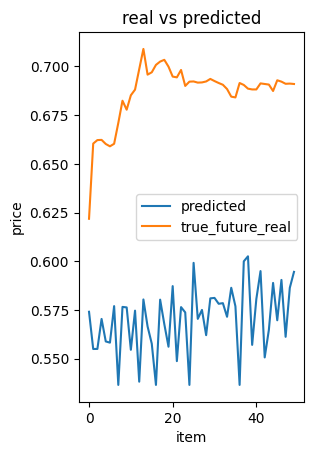

In [ ]:
# Loss plot
plt.subplot(1, 2, 1)
plt.plot(prediction_scaled, label='predicted')
plt.plot(true_future_real, label='true_future_real')
plt.title('real vs predicted')
plt.xlabel('item')
plt.ylabel('price')
plt.legend()
